In [5]:
from generator_based_on_Seattle import *

In [8]:
from parameters import *

In [7]:
generated_traffic = generate_traffic_based_on_seattle(from_date='2020-01-01', to_date='2023-12-31', first_erlang=LAMBDA_0, aggregation='avg', resampling='weekly')

NameError: name 'LAMBDA_0' is not defined

In [3]:
generated_traffic

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
224778,1451.441639,10,13,100,1451.441639,1451.452376
224779,1451.451938,13,1,100,1451.451938,1455.099456
224780,1451.453605,10,6,100,1451.453605,1451.835979
224781,1451.462000,6,8,100,1451.462000,1453.813902


In [4]:
divide_generated_traffic_into_periods(generated_traffic,UPGRADE_PERIOD)[0]

,current_global_time,source_id,destination_id,datarate,arrival_time,departure_time
0,0.000000,9,4,100,0.000000,0.372134
1,0.009420,12,0,100,0.009420,0.522604
2,0.027667,13,6,100,0.027667,2.494361
3,0.028379,2,4,100,0.028379,1.556125
4,0.031656,9,10,100,0.031656,0.348921
...,...,...,...,...,...,...
9427,89.980915,5,6,100,89.980915,90.647433
9428,89.981168,9,6,100,89.981168,90.046882
9429,89.983851,11,1,100,89.983851,90.749823
9430,89.988867,9,8,100,89.988867,90.078582


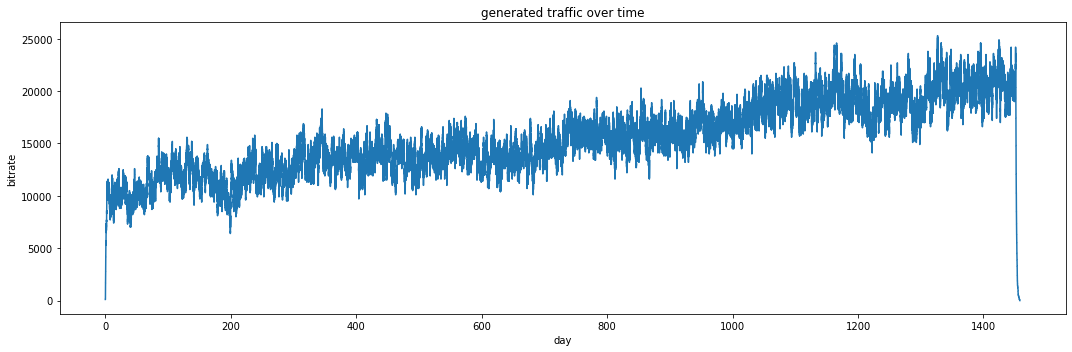

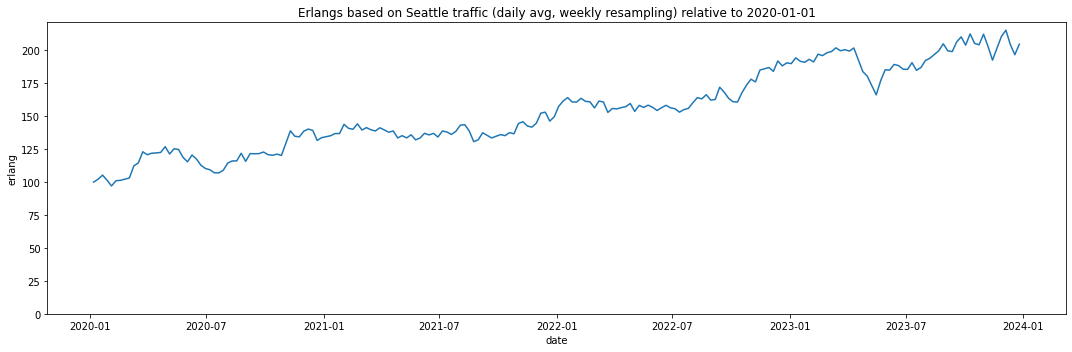

In [5]:
draw_generated_traffic(generated_traffic)
draw_erlangs_from_Seattle(from_date='2020-01-01', to_date='2023-12-31', first_erlang=100, aggregation='avg', resampling='weekly')

In [6]:
predicted_traffic = perdict_traffic(generated_traffic, constant_bitrate=True, period_length=UPGRADE_PERIOD, alpha=1)

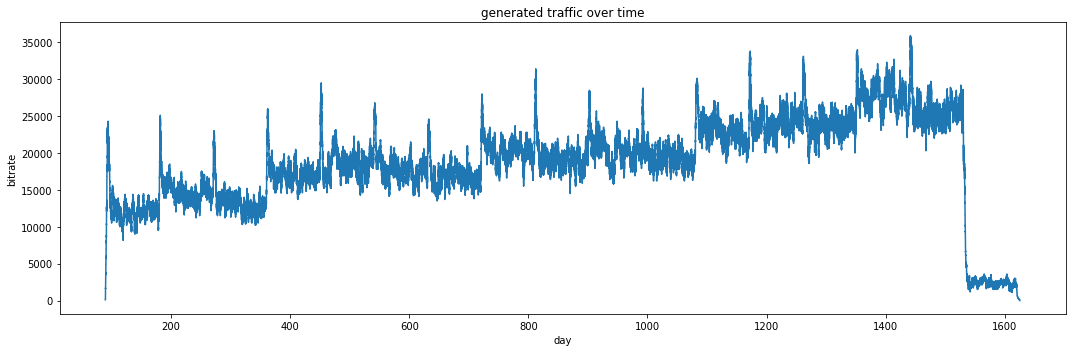

In [7]:
draw_generated_traffic(pd.concat(predicted_traffic))

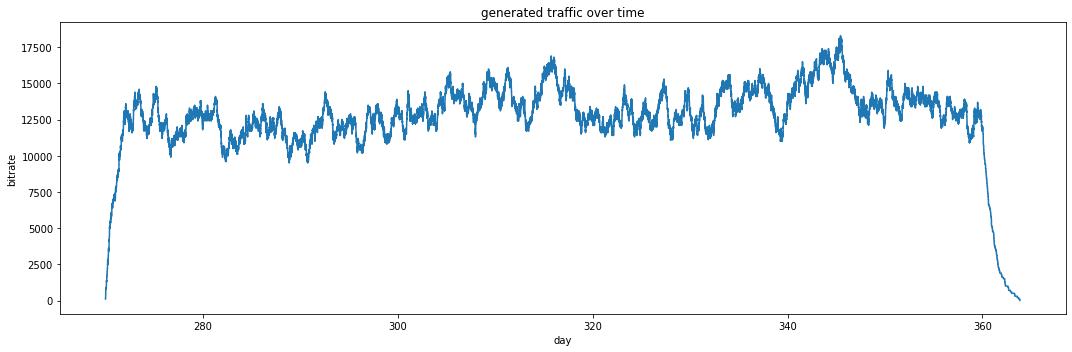

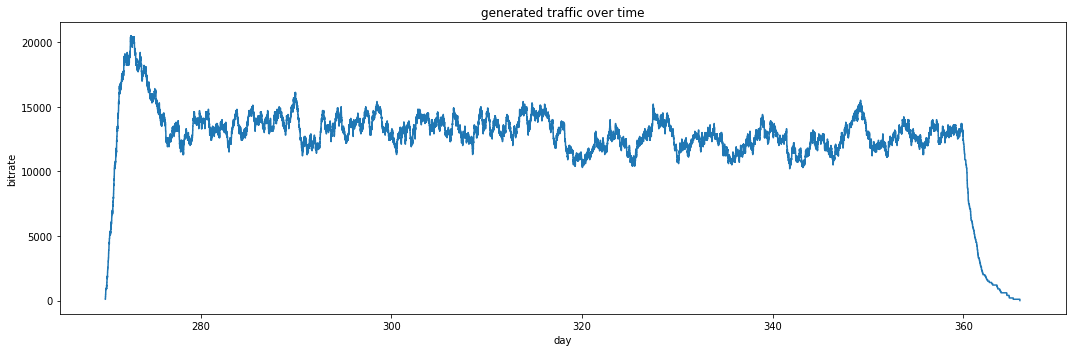

In [8]:
draw_generated_traffic(divide_generated_traffic_into_periods(generated_traffic,UPGRADE_PERIOD)[3])
draw_generated_traffic(predicted_traffic[2])